# 逻辑回归实现
> numpy实现
> 使用a9a.txt的是数据集做二分类

In [8]:
import random
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
from utils import Accumulator

## 读取数据集
> 使用train_test_split函数

In [9]:
x_val, y_val = load_svmlight_file('./a9a.txt', n_features=123)
x_train, y_train = load_svmlight_file('./a9a_train.txt', n_features=123)


## 数据预处理
观察可以看到分类为-1,1

为了方便损失函数的计算我们把-1转变成0

In [10]:
# 简单预处理
y_val[y_val == -1] = 0
y_train[y_train == -1] = 0

# 转换成为np
x_train = np.array(x_train.todense())
x_val = np.array(x_val.todense())
y_train = np.array(y_train).reshape(len(y_train), 1)
y_val = np.array(y_val).reshape(len(y_val), 1)

## 参数设置

In [11]:


# 插入偏置量
b = np.ones(x_train.shape[0])
x_train = np.insert(x_train, 123, values=b, axis=1)

b = np.ones(x_val.shape[0])
x_val = np.insert(x_val, 123, values=b, axis=1)

# 超参数
theta = np.random.normal(size=(x_train.shape[1], 1))

x_train

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## 定义损失函数

In [12]:
def sigmoid(z):
    """sigmoid函数"""
    return 1 / (1 + np.exp(-z))

def logisreg(x, w):
    """逻辑回归模型"""
    return x @ w

def cost(model, y):
    """损失函数（交叉熵）"""
    model = model.reshape(y.shape)
    first = -y.T @ np.log(sigmoid(model))
    second = (1 - y).T @ np.log(1 - sigmoid(model))
    return (first - second) / len(y)

def step_gradient(w_cur, x_value, y_value, lr):
    """
    梯度下降
    :param w_cur:
    :param x_value:
    :param y_value:
    :param lr: 学习率
    :return: 更新后的w参数
    """
    grad = 1 / len(y_value) * x_value.T @ (sigmoid(x_value @ w_cur) - y_value)
    new_w = w_cur - lr * grad
    return new_w



## 计算准确性函数

In [13]:
# 预测检验
def accuracy(y_hat, y, threshold=0.7):  # 阈值设置为0.7
    """计算预测正确数量"""
    if len(y_hat.shape) > 1:
        y_hat = sigmoid(y_hat)
    y_hat[y_hat <= 0.7] = 0.
    y_hat[y_hat > 0.7] = 1.
    cmp = y_hat == y
    return float(cmp.sum())


# 评估任意模型net的准确率
def evaluate_accuracy(model, y):
    """计算在指定数据集上模型的精度"""
    metric = Accumulator(2)  # 正确预测数, 预测总数
    metric.add(accuracy(model, y), len(y))
    return metric[0] / metric[1]

def data_iter(batch_size, features, labels):
    num_examples = len(features)  # 样本数
    # 这些样本是随机读取的
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


## 训练模型

epoch 1, loss_train: 1.097437
epoch 1, loss_val: 1.167285
epoch 1, accuracy: 0.582274
epoch 2, loss_train: 0.798170
epoch 2, loss_val: 0.816398
epoch 2, accuracy: 0.696517
epoch 3, loss_train: 0.737343
epoch 3, loss_val: 0.744254
epoch 3, accuracy: 0.722621
epoch 4, loss_train: 0.755360
epoch 4, loss_val: 0.711879
epoch 4, accuracy: 0.734599
epoch 5, loss_train: 0.733534
epoch 5, loss_val: 0.688250
epoch 5, accuracy: 0.740434
epoch 6, loss_train: 0.734689
epoch 6, loss_val: 0.668116
epoch 6, accuracy: 0.744733
epoch 7, loss_train: 0.654689
epoch 7, loss_val: 0.650315
epoch 7, accuracy: 0.747927
epoch 8, loss_train: 0.687969
epoch 8, loss_val: 0.634325
epoch 8, accuracy: 0.752042
epoch 9, loss_train: 0.551516
epoch 9, loss_val: 0.619888
epoch 9, accuracy: 0.755789
epoch 10, loss_train: 0.649304
epoch 10, loss_val: 0.606774
epoch 10, accuracy: 0.757877
epoch 11, loss_train: 0.570314
epoch 11, loss_val: 0.594810
epoch 11, accuracy: 0.760396
epoch 12, loss_train: 0.619795
epoch 12, loss_va

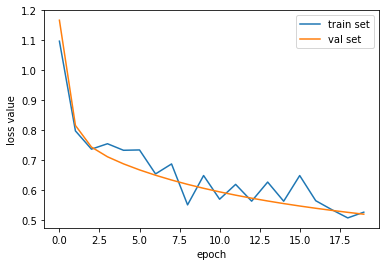

In [14]:
lr = 0.03  # 学习率
num_epochs = 20  # 迭代次数
model =logisreg  # 模型
loss = cost  # 损失函数
batch_size = 1000  # 批量大小

l_train_list = []
l_val_list = []
acc_list = []

In [ ]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, x_train, y_train):
        l_train = loss(model(X, theta), y).sum()   # 计算损失函数
        theta = step_gradient(theta, X, y, lr)
    # 验证
    l_val = loss(model(x_val, theta), y_val).sum()
    acc = evaluate_accuracy(model(x_val, theta), y_val)
    l_train_list.append(l_train)
    l_val_list.append(l_val)
    acc_list.append(acc)
    print(f'epoch {epoch + 1}, loss_train: {l_train:f}')  # 训练集损失函数值
    print(f'epoch {epoch + 1}, loss_val: {l_val:f}')  # 验证集瞬时函数值
    print(f'epoch {epoch + 1}, accuracy: {acc:f}')  # 验证集准确度
    print("=================================================================================")

## 可视化
* 损失函数值

In [ ]:
# 打印损失函数变化
plt.plot(range(num_epochs), l_train_list, label="train set")
plt.plot(range(num_epochs), l_val_list, label="val set")
plt.xlabel("epoch")
plt.ylabel("loss value")
plt.legend(loc="best")
plt.show()

* 准确度

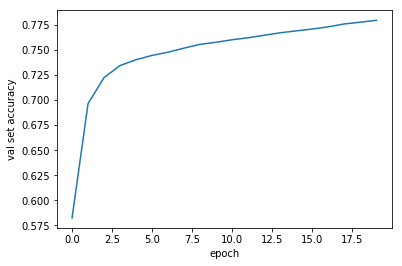

In [15]:
plt.plot(range(num_epochs), acc_list)
plt.xlabel("epoch")
plt.ylabel("val set accuracy")
plt.show()